# Capstone Project: Predicting Outcomes of Asylum Cases

**Author:** Paria Elyasi<br>
**Contact:** pariae@me.com<br>
**Date:** 09-19-2022<br>
**Notebook**: 4 of 5<br>

# Overview

Every year people come to the United States seeking protection because they have suffered persecution or fear that they will suffer persecution due to their race, belief, nationality, political opinion, or being members of particular social group. These people can apply for **Asylum** once they are in the United States.

There are two types of **Asylum**:
- **Affirmative Asylum**  
    - If affirmative application is denied, the applicant goes into removal/deportation proceedings and can file for defensive Asylum. 
    - Affirmative asylum cases are overseen by USCIS (U.S. Citizenship and Immigration Services). 
    
    
- **Defensive Asylum**
    - If the immigrant without an immigration status is put into removal proceedings, they can apply for defensive asylum.
    - Defensive Asylum cases are overseen by Immigration Judges.
    
    
It’s a long and difficult journey for those who seek asylum in the unites states. Their journey doesn’t end until they have their case outcome and that’s whether it was accepted or rejected. 

In this project, we will be predicting outcomes of asylum cases to assist immigration attorneys gain better insight and change their approaches accordingly for a favorable outcome. 

Note that we will be looking at defensive asylum cases.

The data used in this project is from the U.S Department of Justice. Please see the citation below. For more details please refer to the **project report**.

**Please Note:** This is **notebook 4 of 5** that were used to make our final conclusions. In our previous notebook, we built **machine learning models** such as **Logistic Regression Classification Model** and **Decision Tree / Random Forest Classification Model** to predict the outcome of our **target** of **`DECISION`**. We then **evaluated** each model and looked at **feature importance**. 

In this notebook we will build another **machine learning model** using **eXtreme Gradient Boosting** (XGBoost) and evaluate our model. 

**NOTE** that we will be using the **interpretable_ml** conda environment. To create the same environment, please follow the **README.txt** file. 

**Project Citation**: 
U.S. Department of Justice, Executive Office for Immigration Review. EOIR Case Data (July 2019). Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2020-07-07. https://doi.org/10.3886/E120222V1

## Table of Contents

[1. Loading the Data](#Loading-the-Data)<br>
[2. Train-Test Split](#Train-Test-Split)<br>
[3. XGBoost Model](#XGBoost-Model)<br>
[4. Summary](#Summary)<br>

---

# Notebook 4

# Modeling

**Please Note:** this notebook uses **`interpretable_ml`** conda environment kernel. 

In our previous notebook, we built **machine learning models** such as **Logistic Regression Classification Model** and **Decision Tree / Random Forest Classification Model** to predict the outcome of our **target** of **`DECISION`**. We then **evaluated** each model and looked at **feature importance**. 

In this notebook we will build another **machine learning model** using **eXtreme Gradient Boosting** (XGBoost) and evaluate our model. **NOTE** that we will be using the **`interpretable_ml`** conda environment. Please refer to README.txt file for instructions on setting up this environment. 

---

## Import Libraries

First we will import all the libraries we will be using. 

In [1]:
#import all the libraries needed 

#basic packages/libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#library to split the data for modeling
from sklearn.model_selection import train_test_split

#library for scaling - all three scalers
from sklearn.preprocessing import MinMaxScaler

#library for XGBoost
from xgboost import XGBClassifier

#library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#library for 'pickle' - to save fitted models and accuracies 
import joblib

#libraries for model evaluation
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#library for f1 score
from sklearn.metrics import f1_score

#library for classification report
from sklearn.metrics import classification_report

/Users/pariaelyasi/opt/anaconda3/envs/interpretable_ml/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Loading the Data

In this section we will be importing the data and discovering some information such as the shape of our dataframe and column types. This is the same data we used in the previous notebook (notebook 3) for modeling.

In [2]:
#load our data 
df_asylum = pd.read_csv('data/asylum_dataset_modelv2.csv')

In [3]:
#check data
pd.set_option('display.max_columns', None) #display max columns
df_asylum.head()

,DECISION,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATI

In [4]:
#check shape
df_asylum.shape

(482829, 1037)

In [5]:
print(f'Our dataset has {df_asylum.shape[0]} rows and {df_asylum.shape[1]} columns.')

Our dataset has 482829 rows and 1037 columns.


In [6]:
#check info
df_asylum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482829 entries, 0 to 482828
Columns: 1037 entries, DECISION to ATTY_REP_Yes
dtypes: int64(1037)
memory usage: 3.7 GB


In [7]:
#check for null values
df_asylum.isna().sum().sum()

0

Next we will check the class distribution in our dataset.

In [8]:
#check class distribution
df_asylum['DECISION'].value_counts(normalize=True)*100

0    87.657328
1    12.342672
Name: DECISION, dtype: float64

As noted previously we have an imbalanced class distribution however we saw that even with the imbalanced class, our AUC score was 0.95 meaning our logistic regression model was able to separate the classes from one another. 

Next we will define our X and y and check their shape.

In [9]:
#define X and y
X = df_asylum.drop(columns='DECISION')
y = df_asylum['DECISION']

In [10]:
#check X
X.head()

,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATIONALITY_S

In [11]:
#check y
y.head()

0    0
1    0
2    0
3    1
4    0
Name: DECISION, dtype: int64

In [12]:
#check shape for both X and y
print(f'Shape of X is : {X.shape}')
print(f'Shape of y is : {y.shape}')

Shape of X is : (482829, 1036)
Shape of y is : (482829,)


Great, now that we have our X and y set, we can take a Train set and a Test set for our modeling.

## Train-Test Split

In this section we will be splitting our dataset into Train and Test. Note that as we will be using a Train and Validation set later, we will initially call it our Remainder (Train + Validation) and Test split.

We will set our test size as 30% (train size will be 70% of our dataset). Note that between 30% to 20% is ideal for test size. 

In [13]:
#split our X and y into remainder (train + validation) and test sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [14]:
#check shape for X_remainder and y_remainder
print(f'Shape of X_remainder set: {X_remainder.shape}')
print(f'Shape of y_remainder set: {y_remainder.shape}')

Shape of X_remainder set: (337980, 1036)
Shape of y_remainder set: (337980,)


In [15]:
#check shape for X_test and y_test
print(f'Shape of X_test set: {X_test.shape}')
print(f'Shape of y_test set: {y_test.shape}')

Shape of X_test set: (144849, 1036)
Shape of y_test set: (144849,)


Now that we have our remainder (train + validation) and test sets, we can start modeling. 

## XGBoost Model

In this section we will use eXtreme Gradient Boosting (XGBoost) as our classification model. We will start with a baseline model, evaluate it and then use a grid search to find the optimal hyperparameters.

XGBoost is an implementation of the gradient boosted decision trees. In XGBoost decision trees are built in parallel instead of sequentially. 

XGBoost can increase prediction performance of our model with less processing time. 

Note that XGBoost model like decision tree model, is indifferent to scaling. So scaling the remainder and test set is not needed.

Let's start with our baseline XGBoost Model. 

In [16]:
#baseline XG boost model - without scaling
XGB_model_baseline = XGBClassifier(n_jobs=-1)
XGB_model_baseline.fit(X_remainder, y_remainder)
print(f"XG Boost remainder score: {XGB_model_baseline.score(X_remainder, y_remainder)}")
print(f"XG Boost test score: {XGB_model_baseline.score(X_test, y_test)}")

XG Boost remainder score: 0.9397360790579324
XG Boost test score: 0.9355328652596843


Our baseline model for XGBoost is not overfitting and it is performing better than all previous models than we ran in notebook 3. It even slightly outperforming our best logistic regression model in test accuracy. 

Let's look at our best model from previous notebook and compare its accuracy with XGBoost. 

**Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Optimized Logistic Regression Model| 0.932235635|0.931722000
| **XGBoost Model** | **0.939736079** |**0.935532865**

XGBoost model falls under 'black box models' where it's harder to interpret compared to Logistic Regression where you can look at feature coefficients and random forests with feature importance. 

For interpreting models such as XGBoost, we can use other methods which we will explore below. 

Let's interpret our model and look at the predictor features using **SHAP** (**SH**apley **A**dditive Ex**P**lanations).

In [17]:
# Import shap
import shap

# Fit tree-specific kernel for SHAP  
explainer = shap.TreeExplainer(XGB_model_baseline)

# Obtain SHAP values 
shap_values = explainer.shap_values(X_remainder)

In [18]:
# Initiate Javascript for visualization 
shap.initjs()

# Plot SHAP values for row 0 
shap.force_plot(explainer.expected_value,       # Plots the average prediction on the plot
                shap_values[0],                 # Plots the Shapley values on the force plot 
                features=X_remainder.iloc[0],       # 'features' displays the value that is passed to it on the plot; feature value plotted for easier interpretation
                feature_names=X_remainder.columns)  # 'feature_names' displays the name of the features

The above visualization shows the features contributing to push (decide) on the model outcome. Features pushing the prediction higher are shown in red and those pushing the prediction lower are shown in blue. 

We can see that features such as `ABSENTIA_yes`, `HEARING_DATE_YEAR` and `NATIONALITY` for **Guatemala, El Salvador, and Honduras** push our model's prediction higher. 

Features such as `NATIONALITY_MEXICO`, `CUSTODY_Never Detailed`, `CUSTODY_Released`, and `AGE = 28` push our model's prediction lower. 

Let's look at a Beeswarm plot of these SHAP values of our features. 

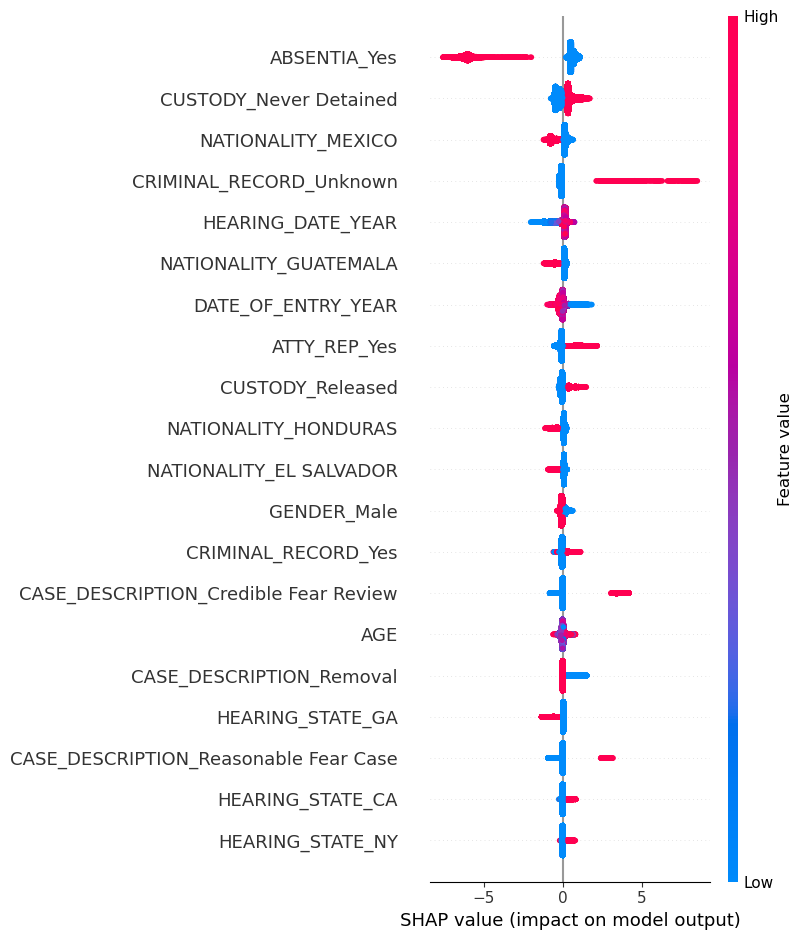

In [19]:
# Global interpretation - summary plot - type = 'dot'
shap.initjs()

shap.summary_plot(shap_values, features=X_remainder, feature_names=X_remainder.columns)

Looking at the above plot we see our input variables ranked from top to bottom by their mean absolute **SHAP** values. The color red indicates that the value of a variable is high and the color blue indicates that the value of a variable is low. 

We can see that `ABSENTIA` (Yes), `CUSTODY` (Never Detained), and  `NATIONALITY` (Mexico) are in top 3 ranked features as our predictors and `ABSENTIA_Yes`, `CRIMINAL_RECORD_Unknown`, `ATTY_REP_Yes` and `CASE_DESCRIPTION` (credible fear review and reasonable fear case) have high values as indicated by the red bar. 

The plot above could be confusing to understand so we can look at a bar plot showing the mean SHAP values. 

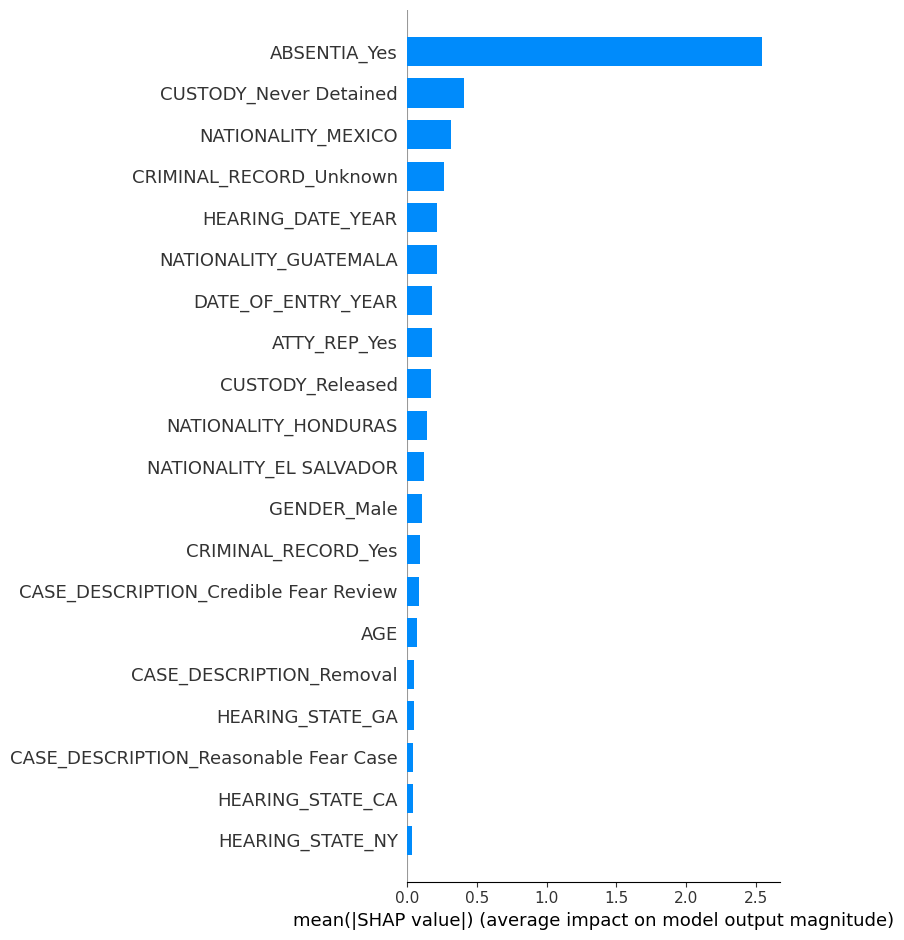

In [20]:
# Global interpretation - summary plot - type='bar'
shap.initjs()

shap.summary_plot(shap_values, features=X_remainder, feature_names=X_remainder.columns, plot_type='bar')

Great, this is easier to read and understand. Note that [this website](#https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/) was referred to in order to gain more information on SHAP values and its plots.

Note that the mean absolute SHAP values are how much each feature impacts the predicted outcome (in positive or negative direction). 

Mean absolute SHAP values rank feature by importance. 

The above plot is showing the mean absolute SHAP values for top feature (importance). It shows us the ranking and relative influence of the features on our model's predicted outcome. 

We can see that besides our top feature of `ABSENTIA` (Yes), features such as `CUSTODY` (Never Detained, Released), `CASE_DESCRIPTION` (Credible Fear Review, and Reasonable Fear Case), `NATIONALITY` (Mexico, Guatemala, Honduras, and El Salvador), `ATTY_REP` (Attorney Representation), `GENDER`, `AGE` and `HEARING_STATE` are all important features in our model's prediction. 

Next we will evaluate our XGBoost Model. 

#### XGBoost Model Evaluation

In [21]:
#get class predictions
y_pred = XGB_model_baseline.predict(X_test)

#generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

#label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Class 0", "Predicted Class 1"],
    index=["True Class 0", "True Class 1"]
)

display(cf_df)

,Predicted Class 0,Predicted Class 1
True Class 0,124685,2286
True Class 1,7052,10826


Another way to view the above confusion matrix is with the **TN, FP, FN, TP** as shown below :

<br>
<br>

|     |  Predicted Class 0  |   Predicted Class 1  | 
| --------- |:---:|:---:|
|True Class 0|**124,685** | **2,286** | 
|True Class 1|**7,052** |**10,826** | 


<br>
<br>

|     |  Predicted Class 0  |   Predicted Class 1  | 
| --------- |:---:|:---:|
|True Class 0|**TN** | **FP** | 
|True Class 1|**FN** |**TP** | 

Note that our target (`DECISION`) consists of class 0 (**REJECTED**) and class 1 (**ACCEPTED**).

To rephrase, class 0 is for cases that were rejected and class 1 is for cases that were accepted. Now let's look at what each of the above numbers mean. 

**True Negative (TN)**: **124,685** data points in **class 0** were **correctly predicted** as class 0 <br>

**False Positive (FP)**: **2,286** data points in **class 0** were **incorrectly predicted** as class 1 <br>

**Ture Positive (TP)**: **10,826** data points in **class 1** were **correctly predicted** as class 1 <br>

**False Negative (FN)**: **7,052** data points that were in **class 1** were **incorrectly predicted** as class 0
<br>
<br>
<br>
We can also plot the confusion matrix to better visualize the number of correct and incorrect predictions.

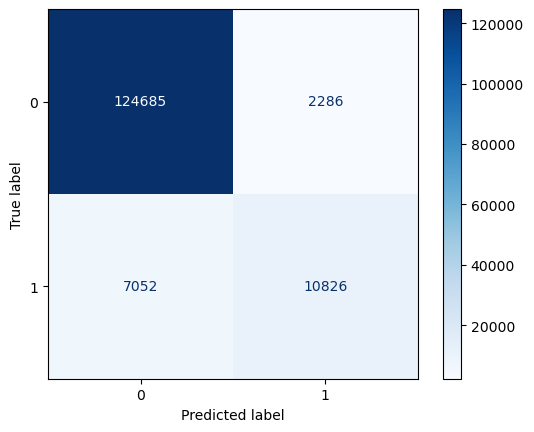

In [22]:
#plot the confusion matrix
plot_confusion_matrix(XGB_model_baseline, X_test, y_test, cmap='Blues');

Again, we can see that our model correctly predicted more data points for class 0 (**True Negative**). The **incorrect** predictions for Class 1 (**FN**) are higher than for Class 0 (**FP**). Even though we didn't have overfitting in our accuracy, we see overfitting in the confusion matrix as the **False Negatives** are higher than our **False Positive**. 

One way to fix this would be to add more features/variables or go back to our preprocessing stage and change our strategy on which features to select. 

- Adding more features:

    - For example adding **weather feature** (which needs to be imported from web for dates that the hearing took place. 
    
    - Adding 'keyword' **news feature** - what was on the news on that certain day (NLP and web scraping). 
    
    - Some features such as **Marital Status** or **Educational Background** would have also been an important feature to train our model on however these were not available in our dataset. (Future of work will be done on immigration dataset from a non-profit which will have these information)


- Update preprocessing selection:

    - For example we could only select years with higher than 5,000 cases or we could select top nationalities. Another option would be to do **forward selection** instead of using all variables at once. 
    

We could also run a Neural Network Model and control the stop point of the learning rate. 

These options could be future of work for this project as mentioned in notebook 3 as well. 

Next we will also look at classification report to view **precision, recall and f1-score** of our logistic regression model.

In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    126971
           1       0.83      0.61      0.70     17878

    accuracy                           0.94    144849
   macro avg       0.89      0.79      0.83    144849
weighted avg       0.93      0.94      0.93    144849



**Precision** is what percent of our model predictions were correct. We can see our model correctly predicted **83%** of class 1 and **95%** of class 0. 

Let's look at our precision this way:

- Of all asylee applicants that were predicted to be granted asylum (get accepted), how many actually got accepted? **83%**

- There were 7,052 asylum applicants that we predicted would not get accepted (asylum granted), however they were accepted (granted asylum). 


**Recall** is what percent of positives were correctly identified. We can see our model correctly identified **61%** of positives in class 1.

Let's look at our recall this way:

- Of all applicants who were granted asylum (accepted), how many were we able to correctly predict? **61%**

**f1-score** is the percentage of correct positive predictions. We can see that it's **70%** for class 1 and **96%** for class 0. 

Choosing the appropriate metric depends on the business objective. For our business objective, we would like to focus on higher precision. 

Why did we pick precision? Because the **false negative** in our case is more acceptable and tolerable than false positive. Meaning that it is easier for immigration attorneys to mistakenly tell their asylee clients they will get rejected when in actuality they will get accepted. It is harder for immigration attorneys to tell their clients mistakenly that their application will be accepted and asylum will be granted when in actuality it will not. Therefore, we will choose precision as our model evaluation metric.

Immigration attorneys would prefer to under promise and over deliver. Meaning that it is better to not give asylum applicants high hopes.

If immigration attorneys were to tell applicants they will get accepted but then the case actually gets rejected, then they have to deliver bad news. On the opposite if they tell applicants that their case will most likely get rejected but it is accepted then they will be delivering good news. 

Next we will look at the ROC Curve and AUC.

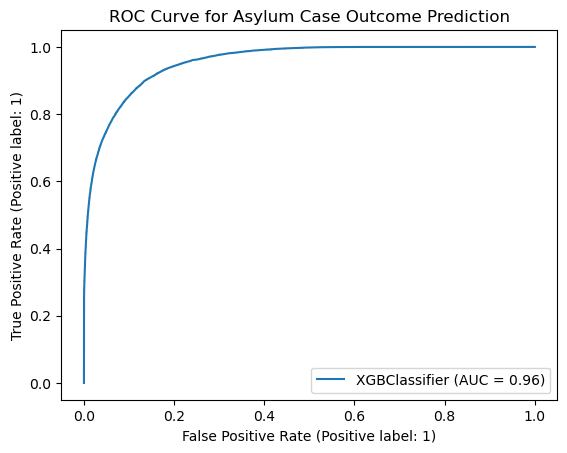

In [24]:
#import library
from sklearn.metrics import plot_roc_curve

#plot ROC curve
plot_roc_curve(XGB_model_baseline, X_test, y_test)
plt.title('ROC Curve for Asylum Case Outcome Prediction')
plt.show()

Our model's **AUC** score is **0.96**. Note that the higher the AUC score, the better our model is predicting class 0 as 0 and class 1 as 1. 

Also our model has a good measure of separability as our **AUC** score is closer to 1. This means that even with our imbalanced classes, our model is able to separate the two classes from one another. 

This is great as we might not need to use balancing methods such as downsampling, upsampling or SMOTE to balance our classes.

Next we will do a gridsearch with XGBoost - note that this is supplementary. 

### Supplementary: Gridsearch with XGBoost

Next we will take a subset and run a gridsearch with xgboost to see if we can improve our score by optimizing the hyperparameters.

In [25]:
#take 10% sample size and set random state
df_subset = df_asylum.sample(frac=0.1, random_state=1)

In [26]:
#check subset shape
df_subset.shape

(48283, 1037)

In [27]:
#reset index - drop the old index
df_subset = df_subset.reset_index(drop=True)

In [28]:
#check class distribution
df_subset['DECISION'].value_counts(normalize=True)*100

0    87.567053
1    12.432947
Name: DECISION, dtype: float64

In [29]:
#define X and y for the subset
X_subset = df_subset.drop(columns='DECISION')
y_subset = df_subset['DECISION']

In [30]:
#check shape for both X and y
print(f'Shape of X_subset is : {X_subset.shape}')
print(f'Shape of y_subset is : {y_subset.shape}')

Shape of X_subset is : (48283, 1036)
Shape of y_subset is : (48283,)


In [31]:
#check X_subset
X_subset.head()

,BIRTHDATE_MONTH,AGE,DATE_OF_ENTRY_DAY,DATE_OF_ENTRY_MONTH,DATE_OF_ENTRY_YEAR,NOTICE_DATE_DAY,NOTICE_DATE_MONTH,HEARING_DATE_DAY,HEARING_DATE_MONTH,HEARING_DATE_YEAR,NATIONALITY_ALBANIA,NATIONALITY_ALGERIA,NATIONALITY_ANGOLA,NATIONALITY_ANGUILLA,NATIONALITY_ANTIGUA AND BARBUDA,NATIONALITY_ARGENTINA,NATIONALITY_ARMENIA,NATIONALITY_ARUBA,NATIONALITY_AUSTRALIA,NATIONALITY_AUSTRIA,NATIONALITY_AZERBAIJAN,NATIONALITY_BAHAMAS,NATIONALITY_BAHRAIN,NATIONALITY_BANGLADESH,NATIONALITY_BARBADOS,NATIONALITY_BE REMOVED FROM THE UNITED STATES,NATIONALITY_BELARUS,NATIONALITY_BELGIUM,NATIONALITY_BELIZE,NATIONALITY_BENIN,NATIONALITY_BERMUDA,NATIONALITY_BHUTAN,NATIONALITY_BOLIVIA,NATIONALITY_BOSNIA-HERZEGOVINA,NATIONALITY_BOTSWANA,NATIONALITY_BRAZIL,NATIONALITY_BRITISH VIRGIN ISLANDS,NATIONALITY_BRUNEI,NATIONALITY_BULGARIA,NATIONALITY_BURKINA FASO,NATIONALITY_BURMA (MYANMAR),NATIONALITY_BURUNDI,NATIONALITY_BYELORUSSIA (BELARUS),NATIONALITY_CAMBODIA,NATIONALITY_CAMEROON,NATIONALITY_CANADA,NATIONALITY_CAPE VERDE,NATIONALITY_CAYMAN ISLANDS,NATIONALITY_CENTRAL AFRICAN REPUBLIC,NATIONALITY_CHAD,NATIONALITY_CHILE,NATIONALITY_CHINA,NATIONALITY_COLOMBIA,NATIONALITY_COMORO ISLANDS,NATIONALITY_CONGO,NATIONALITY_COSTA RICA,NATIONALITY_CROATIA,NATIONALITY_CUBA,NATIONALITY_CYPRUS,NATIONALITY_CZECH REPUBLIC,NATIONALITY_CZECHOSLOVAKIA,NATIONALITY_DEMOCRATIC REPUBLIC OF CONGO,NATIONALITY_DENMARK,NATIONALITY_DJIBOUTI,NATIONALITY_DOMINICA,NATIONALITY_DOMINICAN REPUBLIC,NATIONALITY_EAST GERMANY,NATIONALITY_EAST TIMOR,NATIONALITY_ECUADOR,NATIONALITY_EGYPT,NATIONALITY_EL SALVADOR,NATIONALITY_EQUATORIAL GUINEA,NATIONALITY_ERITREA,NATIONALITY_ESTONIA,NATIONALITY_ETHIOPIA,NATIONALITY_FEDERATED STATES OF MICRONESIA,NATIONALITY_FIJI,NATIONALITY_FINLAND,NATIONALITY_FRANCE,NATIONALITY_FRENCH GUIANA,NATIONALITY_FRENCH POLYNESIA,NATIONALITY_FRENCH WEST INDIES,NATIONALITY_GABON,NATIONALITY_GAMBIA,NATIONALITY_GAZA STRIP,NATIONALITY_GEORGIA,NATIONALITY_GERMANY,NATIONALITY_GHANA,NATIONALITY_GIBRALTAR,NATIONALITY_GREECE,NATIONALITY_GRENADA,NATIONALITY_GUADELOUPE,NATIONALITY_GUATEMALA,NATIONALITY_GUINEA,NATIONALITY_GUINEA BISSAU,NATIONALITY_GUYANA,NATIONALITY_HAITI,NATIONALITY_HOLLAND,NATIONALITY_HONDURAS,NATIONALITY_HONG KONG,NATIONALITY_HUNGARY,NATIONALITY_ICELAND,NATIONALITY_INDIA,NATIONALITY_INDONESIA,NATIONALITY_IRAN,NATIONALITY_IRAQ,NATIONALITY_IRELAND,NATIONALITY_ISRAEL,NATIONALITY_ITALY,NATIONALITY_IVORY COAST (COTE D'IVOIRE),NATIONALITY_JAMAICA,NATIONALITY_JAPAN,NATIONALITY_JORDAN,NATIONALITY_KAMPUCHEA,NATIONALITY_KAZAKHSTAN,NATIONALITY_KENYA,NATIONALITY_KIRGHIZIA (KYRGYZSTAN),NATIONALITY_KOSOVO,NATIONALITY_KUWAIT,NATIONALITY_LAOS,NATIONALITY_LATVIA,NATIONALITY_LEBANON,NATIONALITY_LESOTHO,NATIONALITY_LIBERIA,NATIONALITY_LIBYA,NATIONALITY_LITHUANIA,NATIONALITY_LUXEMBOURG,NATIONALITY_MACAU,NATIONALITY_MACEDONIA,NATIONALITY_MADAGASCAR,NATIONALITY_MALAWI,NATIONALITY_MALAYSIA,NATIONALITY_MALI,NATIONALITY_MALTA,NATIONALITY_MARTINIQUE,NATIONALITY_MAURITANIA,NATIONALITY_MAURITIUS,NATIONALITY_MEXICO,NATIONALITY_MIDWAY ISLANDS,NATIONALITY_MOLDAVIA (MOLDOVA),NATIONALITY_MONACO,NATIONALITY_MONGOLIA,NATIONALITY_MONTENEGRO,NATIONALITY_MONTSERRAT,NATIONALITY_MOROCCO,NATIONALITY_MOZAMBIQUE,NATIONALITY_NAMIBIA,NATIONALITY_NEPAL,NATIONALITY_NETHERLANDS,NATIONALITY_NETHERLANDS ANTILLES,NATIONALITY_NEW ZEALAND,NATIONALITY_NICARAGUA,NATIONALITY_NIGER,NATIONALITY_NIGERIA,NATIONALITY_NORTH KOREA,NATIONALITY_NORWAY,NATIONALITY_OMAN,NATIONALITY_PAKISTAN,NATIONALITY_PALESTINE,NATIONALITY_PANAMA,NATIONALITY_PAPUA NEW GUINEA,NATIONALITY_PARAGUAY,NATIONALITY_PEOPLE'S REPUBLIC OF BENIN,NATIONALITY_PERU,NATIONALITY_PHILIPPINES,NATIONALITY_PITCAIRN ISLANDS,NATIONALITY_POLAND,NATIONALITY_PORTUGAL,NATIONALITY_QATAR,NATIONALITY_ROMANIA,NATIONALITY_RUSSIA,NATIONALITY_RWANDA,NATIONALITY_SAMOA,NATIONALITY_SAO TOME AND PRINCIPE,NATIONALITY_SAUDI ARABIA,NATIONALITY_SENEGAL,NATIONALITY_SERBIA MONTENEGRO,NATIONALITY_SEYCHELLES,NATIONALITY_SIERRA LEONE,NATIONALITY_SINGAPORE,NATIONALITY_SLOVAK REPUBLIC,NATIONALITY_S

In [32]:
#check y_subset 
y_subset

0        1
1        0
2        0
3        0
4        0
        ..
48278    0
48279    0
48280    0
48281    1
48282    0
Name: DECISION, Length: 48283, dtype: int64

Next we will split our subsets into remainder (train + validation) set and test set. 

In [33]:
#split our X_subset and y_subset into remainder (train + validation) and test sets
X_sub_remainder, X_sub_test, y_sub_remainder, y_sub_test = train_test_split(X_subset, y_subset, test_size=0.30, random_state=1, stratify=y_subset)

Great, now that we have our subset, we can run our gridsearch and compare it's accuracy score with our baseline model. 

In [34]:
#import library
from sklearn.model_selection import GridSearchCV

#instantiate
my_xgb = XGBClassifier(n_jobs=-1)

#choose range for parameters
param_grid = {'n_estimators': np.arange(1, 60, 2), 'max_depth': np.arange(1, 9)}
grid_xgb = GridSearchCV(my_xgb, param_grid=param_grid, verbose=1, n_jobs=-1)

#fit 
grid_xgb.fit(X_sub_remainder, y_sub_remainder)

#score
print(f"XG Boost remainder score: {grid_xgb.score(X_sub_remainder, y_sub_remainder)}")
print(f"XG Boost test score: {grid_xgb.score(X_sub_test, y_sub_test)}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
XG Boost remainder score: 0.9427185040534943
XG Boost test score: 0.9262685536762167


Our gridsearch didn't perform as well as our baseline model. We could potentially update the range for the hyperparameters (`n_estimators`, `max_depth`), however that increases run time. This was only to show case that gridsearch could be done. 

Let's make a dataframe with the results and look at the scores for these different hyperparameters. 

In [35]:
#get results key
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [36]:
#input results into dataframe to view
results_df = pd.DataFrame({
    
    "n_estimators": grid_xgb.cv_results_['param_n_estimators'],
    'max_depth' : grid_xgb.cv_results_['param_max_depth'].astype(str),
    'mean_score': grid_xgb.cv_results_['mean_test_score']
})

results_df.head()

,n_estimators,max_depth,mean_score
0,1,1,0.905823
1,3,1,0.905823
2,5,1,0.905823
3,7,1,0.905823
4,9,1,0.905645


Let's plot these and look at the mean score. 

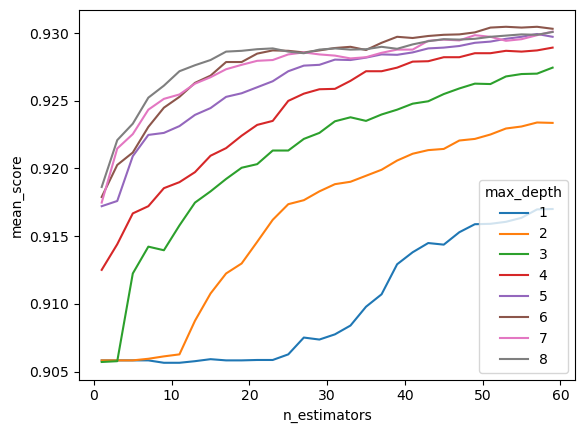

In [37]:
#plot
plt.figure()
sns.lineplot(x="n_estimators", y="mean_score", hue="max_depth", data=results_df)
plt.show()

Again as mentioned, we could have added more `n_estimators` (higher range) since we can see the mean score climbing up every at 60 estimators however it would increase the run-time. 

This can later be done in AWS SageMaker. Next we will look at what the best n_estimators and max_depth was in our gridsearch which gave us the above results.

In [38]:
#look at best estimator
grid_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=53, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

/Users/pariaelyasi/opt/anaconda3/envs/interpretable_ml/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/pariaelyasi/opt/anaconda3/envs/interpretable_ml/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/pariaelyasi/opt/anaconda3/envs/interpretable_ml/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/pariaelyasi/opt/anaconda3/envs/interpretable_ml/lib/python3.8/site-packages/xgboost/com

Best `n_estimators` is 53 and best `max_depth` is 6.

Note that we will note evaluate this model as it was mainly supplementary. 

We conclude that out of all the models we fitted, **XGBoost Model** had the best accuracy, precision and recall score. This concludes our XGBoost Modeling notebook. 

---

# Summary

In this notebook, we used XGBoost model to predict the outcomes of asylum cases.


**XGBoost Model**
- We started by fitting a baseline model without additional hyperparameters and the model accuracy score on the test were higher than all previous models we ran and was not overfitting. 

**Model Assessment** <br>
 
| Model   | Remainder Accuracy   | Test Accuracy|
|-------------|-------|----------|
| Optimized Logistic Regression Model| 0.932235635|0.931722000
| **XGBoost Model** | **0.939736079** |**0.935532865**


- We interpreted our model and looked at the predictor features using **SHAP** (**SH**apley **A**dditive Ex**P**lanations).    

    - We saw that `ABSENTIA` (Yes), `CUSTODY` (Never Detained, Released), `CASE_DESCRIPTION` (Credible Fear Review, and Reasonable Fear Case), `NATIONALITY` (Mexico, Guatemala, Honduras, and El Salvador), `ATTY_REP` (Attorney Representation), `GENDER`, `AGE` and `HEARING_STATE` were all important features in our model's prediction. 

**Model Evaluation**
- We evaluated our best model which was the **XGBoost Model**. Our model correctly predicted more data points for class 0 (**True Negative**). The incorrect predictions for Class 1 (FN) wer higher than for Class 0 (FP). Even though we didn't have overfitting in our accuracy, we saw **overfitting in the confusion matrix** as the **False Negatives were higher than our False Positive**.


- Looking at **precision**:
    - Our model correctly predicted **80% of class 1** and **94% of class 0**.
    - There were 7,052 asylum applicants that we predicted would not get accepted (asylum granted), however they were accepted (granted asylum).
    
    
- Looking at **recall**:
    - Our model correctly identified 61% of positives in class 1 and 98% in class 0.
    - Of all applicants who were granted asylum (accepted),we were we able to correctly predict 61%. 
    
    
- Looking at **ROC Curve and AUC score**:
    - Our model's AUC score was 0.96. 
    - Our model had a good measure of separability as our AUC score was closer to 1. This means that even with our imbalanced classes, our model was able to separate the two classes from one another.
    
    
We discussed how choosing the appropriate metric depends on the business objective. For our business objective, we chose to focus on higher precision.

Why did we pick precision? Because the false negative in our case is more acceptable and tolerable than false positive. Meaning that it is easier for immigration attorneys to mistakenly tell their asylee clients they will get rejected when in actuality they will get accepted. It is harder for immigration attorneys to tell their clients mistakenly that their application will be accepted and asylum will be granted when in actuality it will not. Therefore, we chose precision as our model evaluation metric.
    
We concluded that out of all the models we fitted, **XGBoost Model** had the best accuracy and precision score. 

This concludes our modeling for notebook 4. We will run another model (Logistic Regression with `class_weight = 'balanced` hyperparameter) in notebook 5 and compare its performance to our imbalanced logistic regression model (Optimized Logistic Regression Model). Note that this is a supplementary step and only to look at the difference if we used this hyperparameter. 

---